In [1]:
%matplotlib inline
import numpy as np
from pandas import DataFrame as df
from Classifiers import TransparentRidge
from Classifiers import TransparentLasso
from scipy.sparse import diags
import matplotlib.pyplot as plt
import PredictiveModels as pm
import pandas as pd
from LatestPreprocessing import *

# User Transparency

In [2]:
pd.set_option('display.width', 100)
user_stats = pd.read_csv('ml-latest/user_stats.csv', sep = ',',nrows=20)
print user_stats.head(10)

   User ID  Number of Ratings  Average Rating  Variance  Genre Ratio  Key Ratio  Fitness
0   242763               1929           2.875     4.092            0      0.040    0.369
1    28451               1274           2.813     3.909            0      0.086    0.305
2    87971               1181           3.383     3.426            0      0.065    0.278
3   155440               1028           2.631     3.292            0      0.085    0.245
4    60484               1224           2.054     3.114            0      0.077    0.234
5   120899               2031           2.662     2.356            0      0.022    0.214
6    46262                747           2.509     3.603            0      0.159    0.202
7   225941               1646           1.797     2.348            0      0.037    0.198
8   170099               2067           3.215     2.179            0      0.021    0.197
9   234450               1798           2.885     2.215            0      0.034    0.187


## Loading user matrix

In [3]:
userid = 242763
user_ratings = get_matched_user_ratings(userid)
movies = user_ratings.keys()
ratings = user_ratings.values()
print "User average rating: ", np.average(ratings)
print "Number of movies rated by this user: ", len(ratings)

User average rating:  2.86393692777
Number of movies rated by this user:  1966


In [4]:
print "Loading average and number of rating"
id_dict = get_id_row_dict()
idxs = [id_dict[k] for k in movies]
avg_and_num = sort_avg()

Loading average and number of rating


## Highest rated movies

In [5]:
movie_set = pd.read_csv("ml-latest/matched_set.csv", sep = ",")
avg_df = df(np.column_stack((movie_set.title,avg_and_num)), columns = ("Movie", "Average Rating", "Number of Ratings"))
print avg_df.loc[avg_df["Number of Ratings"] > 100].sort(["Average Rating", "Number of Ratings"], ascending=[0,0]).head(20)

                                                   Movie Average Rating Number of Ratings
10075                    THE SHAWSHANK REDEMPTION (1994)       4.442559             77367
6085                                THE GODFATHER (1972)       4.354139             49554
3561                           THE USUAL SUSPECTS (1995)       4.319778             52957
18479                            SCHINDLER'S LIST (1993)       4.292279             59539
20916                      THE GODFATHER: PART II (1974)       4.269065             32048
18913                        SHICHININ NO SAMURAI (1954)       4.263744             12696
6943                                  REAR WINDOW (1954)       4.248423             19338
10182             ONE FLEW OVER THE CUCKOO'S NEST (1975)       4.243332             35657
15480                                  FIGHT CLUB (1999)       4.234274             48471
8583                                   CASABLANCA (1942)       4.233015             27715
12624  DR.

In [6]:
all_names = get_movie_names()
names = all_names[idxs]
rating_df = df(np.column_stack((names,ratings)), columns = ("Movie", "Rating"))
print rating_df.sort(["Rating"], ascending=0).head(20)

                                         Movie Rating
0                             TOY STORY (1995)      5
983                     THE FISHER KING (1991)      5
1964                     EDUCATING RITA (1983)      5
1963                               RUSH (1991)      5
1962                      LA DOLCE VITA (1960)      5
437                     THE DEER HUNTER (1978)      5
869             THE BLAIR WITCH PROJECT (1999)      5
7     AT PLAY IN THE FIELDS OF THE LORD (1991)      5
1954                             HARPER (1966)      5
1950        SUPPORT YOUR LOCAL SHERIFF! (1969)      5
10                       THE WILD GEESE (1978)      5
874                              LOLITA (1962)      5
1949   PERFUME: THE STORY OF A MURDERER (2006)      5
1948             HOW TO STEAL A MILLION (1966)      5
876                         THE MISSION (1986)      5
877                        FROM THE HIP (1987)      5
878      THE NIGHT OF THE FOLLOWING DAY (1968)      5
1944                   THE P

## User rating distribution

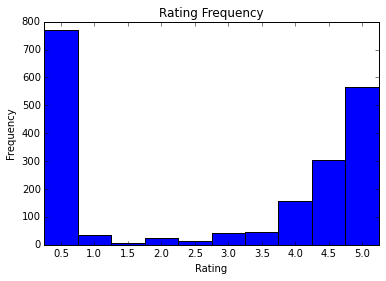

In [7]:
x = ratings
his = np.histogram(x, bins = np.arange(0.5,6,0.5))
fig, ax = plt.subplots()
offset = 0.25
plt.bar(his[1][1:],his[0],width=.5)
ax.set_xticks(his[1][1:] + offset)
ax.set_xticklabels(np.arange(0.5,6,0.5))
plt.title("Rating Frequency")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

## Genre Distribution

In [8]:
print "Loading genre matrix"
genre_matrix = get_genre_matrix()[idxs]
genre_dict = get_genre_dict()
inv_map = {v: k for k, v in genre_dict.items()}
names = [inv_map[k] for k in range(len(genre_dict))]

Loading genre matrix


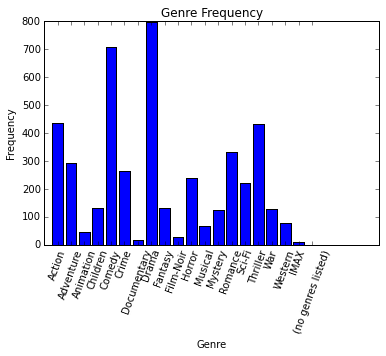

In [9]:
x = np.sum(genre_matrix, axis=0)
his = np.histogram(x, bins = range(0,21))
fig, ax = plt.subplots()
offset = 0
plt.bar(his[1][1:],x,align='center')
ax.set_xticks(his[1][1:] + offset)
ax.set_xticklabels((list(names)))
locs, labels = plt.xticks()
plt.setp(labels, rotation=70)
plt.title("Genre Frequency")
plt.xlabel("Genre")
plt.ylabel("Frequency")
plt.show()

In [10]:
print "Loading key matrix"
keywords = pd.read_csv("ml-latest/matched_movies", delimiter='\t', usecols = [0,3], names = ['id', 'key'] )
x = get_popular_key_dict(keywords.key)
inv_map = {v: k for k, v in x.items()}
names = np.array([inv_map[k] for k in range(len(x))])
user_key_matrix = get_keyword_matrix()[idxs]

Loading key matrix
Number of popular keys:

 2336


## User Keyword Frequency

In [11]:
frequency = np.sum(user_key_matrix, axis=0, dtype = int)
indices = np.argsort(frequency)
keyword_df = df((np.column_stack((names[indices], frequency[indices]))), columns = ("Keyword", "Frequency"))
print keyword_df.sort(["Frequency"], ascending = 0).head(20)

                Keyword Frequency
2070     person-on-fire        99
2071            tragedy        99
2073          urination        99
2072     premarital-sex        99
2065            general        98
2066              1960s        98
2067          obsession        98
2068       double-cross        98
2069              theft        98
2064     unfaithfulness        98
2061         first-part        97
2063             hitman        97
2062     child-in-peril        97
2060        convertible        97
2059         flashlight        97
2058              judge        97
2057  product-placement        97
2056         california        97
2055          scientist        97
2053      strangulation        96


## User Actor Frequency

In [12]:
print "Loading actor matrix"
actor_matrix = get_actor_matrix()[idxs]
frequency = np.sum(actor_matrix, axis=0)
names = get_actor_names()
actor_df = df((np.column_stack((names, frequency))), columns = ("Actor", "Frequency"))
print actor_df.sort_index(by=["Frequency"], ascending = 0).head(20)

Loading actor matrix
                   Actor Frequency
921   Henry, William (I)       9.0
1867         Zane, Billy       9.0
922         Hensen, Lars       9.0
1864       Yulin, Harris       9.0
1861     Young, Carleton       9.0
1860     Young, Burt (I)       9.0
924     Herman, Paul (I)       9.0
931     Hicks, Chuck (I)       9.0
953       Homans, Robert       9.0
954      Hong, James (I)       9.0
371         Bellamy, Ned       9.0
1847      Wood, Fred (I)       9.0
961     Hordern, Michael       9.0
13    Bancroft, Anne (I)       9.0
574      Corey, Jeff (I)       9.0
365          Beatty, Ned       9.0
996        Isaacs, Jason       9.0
913          Hedaya, Dan       9.0
351        Barber, Bobby       9.0
1834   Wilson, Harry (I)       9.0

## Finding min alpha for user

In [14]:
pp.scale(avg_and_num[:,0], with_mean=True, with_std=True, copy=False)
pp.scale(avg_and_num[:,1], with_mean=True, with_std=True, copy=False)
data = np.column_stack((avg_and_num[idxs], genre_matrix, user_key_matrix, actor_matrix))
target = ratings
alphas = np.arange(10,30,2)
min_ridge_mae = 2
avg_mae_list =list()
for alpha in alphas:
    mae_list = list()
    results = pm.get_ridge_cv_results(np.column_stack((data,target)), alpha, 10)
    mae = results[0]
    mae_list.append(results[0])
    if mae < min_ridge_mae:
        min_ridge_mae = mae
        min_ridge_alpha = alpha
        min_ridge_maes = mae_list
    avg_mae_list.append(mae)
print pd.DataFrame(np.column_stack((alphas,avg_mae_list)), columns = ['Alpha', 'MAE'])
print "Optimal alpha is: ", min_ridge_alpha

   Alpha       MAE
0     10  1.203470
1     12  1.188425
2     14  1.177293
3     16  1.169194
4     18  1.163020
5     20  1.158005
6     22  1.153976
7     24  1.150968
8     26  1.148604
9     28  1.146688
Optimal alpha is:  28


## Creating Ridge Model with Cross Validation and 10 Folds

In [15]:
results = pm.get_ridge_cv_results(np.column_stack((data,target)), min_ridge_alpha, 10)

y_pred = results[2]
ratings = user_ratings.values()
error_from_pred = np.abs(ratings-y_pred)

col_names = ["Movie ID" ,"User Rating","Model Prediction","Model Error"]

col_avg = ["Average:", np.average(ratings),np.average(y_pred),np.average(error_from_pred)]
user_result = np.column_stack((user_ratings.keys(), ratings, y_pred, error_from_pred))
user_result = user_result[np.argsort(user_result[:, 3])]
user_result = np.vstack((user_result,col_avg))

results_df = pd.DataFrame(user_result, columns = col_names)
print "Ten Lowest Errors"
print results_df.head(10)
print "\nTen Highest Errors"
print results_df.tail(10)

Ten Lowest Errors
  Movie ID User Rating Model Prediction       Model Error
0   5388.0         5.0    4.99983193058  0.00016806942459
1   7723.0         0.5   0.497206518128  0.00279348187163
2   4306.0         5.0     5.0032072433   0.0032072432951
3   2050.0         0.5   0.504205972256  0.00420597225642
4   2571.0         4.5    4.49474857326  0.00525142674144
5   3695.0         0.5   0.507078080256  0.00707808025589
6   3580.0         5.0    4.99254768443  0.00745231557186
7   2835.0         0.5   0.514254601017   0.0142546010173
8   3922.0         0.5   0.485260221376   0.0147397786244
9   5962.0         4.0    3.98448125045   0.0155187495471

Ten Highest Errors
      Movie ID    User Rating Model Prediction    Model Error
1957     590.0            3.0    7.25934916075  4.25934916075
1958    1230.0            1.0    5.35425462252  4.35425462252
1959    2977.0            0.5    4.98080191328  4.48080191328
1960   50253.0            0.5    5.01010708727  4.51010708727
1961    2294.0

## Creating Ridge Model with Full Training Set

In [16]:
clf =TransparentRidge(0.1)
user_cols = data.shape[1]+1
clf.fit(data,target)
weights = clf.coef_
neg_evi, pos_evi = clf.predict_evidences(data)
bias = clf.get_bias()
y_pred = clf.predict(data)
indices = np.argsort(y_pred)
coef_diags = diags(clf.coef_, 0)
dm = data * coef_diags

## Weights and Features

In [17]:
get_popular_key_dict(keywords.key)
inv_map = {v: k for k, v in x.items()}
key_names = [inv_map[k] for k in range(len(x))]
genre_names = get_genre_dict().keys()
actor_names = get_actor_names()
features = np.hstack([['Average Rating', 'Number of Ratings'], genre_names, key_names, actor_names])

positive_weight_indices = weights > 0
negative_weight_indices = weights < 0

positive_features = np.column_stack((features[positive_weight_indices], weights[positive_weight_indices].astype(float)))
negative_features = np.column_stack((features[negative_weight_indices], weights[negative_weight_indices].astype(float)))

positive_df = pd.DataFrame(positive_features, columns = ["Features", "Weights"])
positive_df = positive_df.convert_objects(convert_numeric=True)
positive_df = positive_df.sort("Weights", ascending=0)

negative_df = pd.DataFrame(negative_features, columns = ["Features", "Weights"])
negative_df = negative_df.convert_objects(convert_numeric=True)

negative_df = negative_df.sort("Weights", ascending=1)

print positive_df.head(10)
print negative_df.head(10)

               Features   Weights
1570  Garner, James (I)  1.628968
0        Average Rating  1.442980
1448      Connery, Sean  1.236309
1568   Garcia, Andy (I)  1.183025
1192      Basinger, Kim  1.025452
609              vision  0.976274
877      midlife-crisis  0.875480
1717     Keitel, Harvey  0.861136
1116           japanese  0.838780
256        exploitation  0.797129
                 Features   Weights
898                dating -0.865185
401           immigration -0.861430
1478         Daheim, John -0.855460
1233       Griffis, Rhoda -0.828670
843           severed-leg -0.809408
1288        Sorvino, Mira -0.773357
1252     Kelly, Helen (I) -0.754300
1167  interracial-romance -0.741710
1744         Mayne, Ferdy -0.738989
689           love-affair -0.738925


## The Highest Predicted Rating

In [18]:
j = indices[-1]
titles = pd.read_csv("ml-latest/matched_set.csv", sep = ",")
movie_id = movies[j]
movie_index = np.where(movies == movie_id)
movie_dm = dm[movie_index][0]
feature_names = features

positive_weights = movie_dm[movie_dm > 0]
negative_weights = movie_dm[movie_dm < 0]

positive_names = feature_names[movie_dm > 0]
negative_names = feature_names[movie_dm < 0]

positive_weights = np.column_stack((positive_names,positive_weights))
positive_weights = positive_weights[np.argsort(positive_weights[:,1])][::-1]

negative_weights = np.column_stack((negative_names,negative_weights))
negative_weights = negative_weights[np.argsort(negative_weights[:,1])][::-1]

positive_df = pd.DataFrame(positive_weights, columns = ["Feature", "Weights"])
positive_df = positive_df.convert_objects(convert_numeric=True)

negative_df = pd.DataFrame(negative_weights, columns = ["Feature", "Weights"])
negative_df = negative_df.convert_objects(convert_numeric=True)

pd.options.display.float_format = '{:,.4f}'.format

print "Movie Title: ", all_names[id_dict[movie_id]]
print "Actual User Rating: ", user_ratings[movie_id]
print "Predicted User Rating: ", y_pred[j]

Movie Title:  THE ENTERTAINER (1960)
Actual User Rating:  5.0
Predicted User Rating:  5.03370867769


### Movie Rating Distribution

Number of Ratings: 141


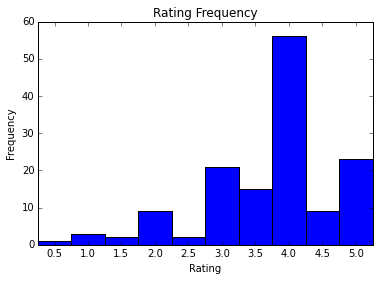

In [19]:
ratings = pd.read_csv("ml-latest/ratings.csv", delimiter=',', quotechar='"', names = ['userId', 'movieId', 'rating'])
movie_ratings = ratings.loc[ratings['movieId'] == movie_id]
x = movie_ratings
his = np.histogram(x, bins = np.arange(0.5,6,0.5))
fig, ax = plt.subplots()
offset = 0.25
plt.bar(his[1][1:],his[0],width=.5)
ax.set_xticks(his[1][1:] + offset)
ax.set_xticklabels(np.arange(0.5,6,0.5))
print "Number of Ratings:", movie_ratings.shape[0]
plt.title("Rating Frequency")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

### Evidence

In [20]:
print "Prediction: ",  y_pred[j]
print "Bias and evidences:", bias, neg_evi[j], pos_evi[j]
print "Positive Features"
print positive_df.head(10)
print "Negative Features"
print negative_df.head(10)

Prediction:  5.03370867769
Bias and evidences: 2.59323127438 -1.22451047021 3.66498787352
Positive Features
                        Feature  Weights
0                Average Rating   1.2979
1             Olivier, Laurence   0.6379
2                 based-on-play   0.3810
3                    alcoholism   0.3795
4             behind-the-scenes   0.3795
5              independent-film   0.1737
6       father-son-relationship   0.1642
7  father-daughter-relationship   0.1323
8                         Drama   0.1008
9                         anger   0.0177
Negative Features
                Feature  Weights
0           grandfather  -0.2811
1              adultery  -0.2586
2        Finney, Albert  -0.2411
3  family-relationships  -0.1677
4  dysfunctional-family  -0.1371
5          death-of-son  -0.0503
6   extramarital-affair  -0.0465
7             alcoholic  -0.0420


## The Lowest Rating

In [21]:
j = indices[0]
titles = pd.read_csv("ml-latest/matched_set.csv", sep = ",")
movie_id = movies[j]
movie_index = np.where(movies == movie_id)
movie_dm = dm[movie_index][0]
feature_names = features

positive_weights = movie_dm[movie_dm > 0]
negative_weights = movie_dm[movie_dm < 0]

positive_names = feature_names[movie_dm > 0]
negative_names = feature_names[movie_dm < 0]

positive_weights = np.column_stack((positive_names,positive_weights))
positive_weights = positive_weights[np.argsort(positive_weights[:,1])][::-1]

negative_weights = np.column_stack((negative_names,negative_weights))
negative_weights = negative_weights[np.argsort(negative_weights[:,1])][::-1]

positive_df = pd.DataFrame(positive_weights, columns = ["Feature", "Weights"])
positive_df = positive_df.convert_objects(convert_numeric=True)

negative_df = pd.DataFrame(negative_weights, columns = ["Feature", "Weights"])
negative_df = negative_df.convert_objects(convert_numeric=True)

pd.options.display.float_format = '{:,.4f}'.format

print "Movie Title: ", all_names[id_dict[movie_id]]
print "Actual User Rating: ", user_ratings[movie_id]
print "Predicted User Rating: ", y_pred[j]

Movie Title:  ALIEN FROM L.A. (1988)
Actual User Rating:  0.5
Predicted User Rating:  0.193455411624


### Movie Rating Distribution

Number of Ratings: 72


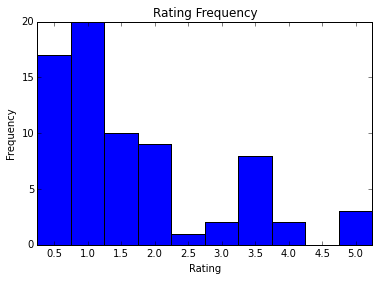

In [22]:
movie_ratings = ratings.loc[ratings['movieId'] == movie_id]
x = movie_ratings
his = np.histogram(x, bins = np.arange(0.5,6,0.5))
fig, ax = plt.subplots()
offset = 0.25
plt.bar(his[1][1:],his[0],width=.5)
ax.set_xticks(his[1][1:] + offset)
ax.set_xticklabels(np.arange(0.5,6,0.5))
print "Number of Ratings:", movie_ratings.shape[0]
plt.title("Rating Frequency")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

### Evidence

In [23]:
print "Prediction: ",  y_pred[j]
print "Bias and evidences:", bias, neg_evi[j], pos_evi[j]
print "Positive Features"
print positive_df.head(10)
print "Negative Features"
print negative_df.head(10)

Prediction:  0.193455411624
Bias and evidences: 2.59323127438 -2.70623786088 0.306461998117
Positive Features
                        Feature  Weights
0              independent-film   0.1737
1  father-daughter-relationship   0.1323
2             Number of Ratings   0.0005
Negative Features
              Feature  Weights
0      Average Rating  -2.5901
1  (no genres listed)  -0.1161


## The case that has the most negative evidence, regardless of positive evidence

In [24]:
j = np.argsort(neg_evi)[0]
titles = pd.read_csv("ml-latest/matched_set.csv", sep = ",")
movie_id = movies[j]
movie_index = np.where(movies == movie_id)
movie_dm = dm[movie_index][0]
feature_names = features

positive_weights = movie_dm[movie_dm > 0]
negative_weights = movie_dm[movie_dm < 0]

positive_names = feature_names[movie_dm > 0]
negative_names = feature_names[movie_dm < 0]

positive_weights = np.column_stack((positive_names,positive_weights))
positive_weights = positive_weights[np.argsort(positive_weights[:,1])][::-1]

negative_weights = np.column_stack((negative_names,negative_weights))
negative_weights = negative_weights[np.argsort(negative_weights[:,1])][::-1]

positive_df = pd.DataFrame(positive_weights, columns = ["Feature", "Weights"])
positive_df = positive_df.convert_objects(convert_numeric=True)

negative_df = pd.DataFrame(negative_weights, columns = ["Feature", "Weights"])
negative_df = negative_df.convert_objects(convert_numeric=True)

pd.options.display.float_format = '{:,.4f}'.format

print "Movie Title: ", all_names[id_dict[movie_id]]
print "Actual User Rating: ", user_ratings[movie_id]
print "Predicted User Rating: ", y_pred[j]

Movie Title:  THE DEPARTED (2006)
Actual User Rating:  5.0
Predicted User Rating:  4.99937806679


### Movie Rating Distribution

Number of Ratings: 18133


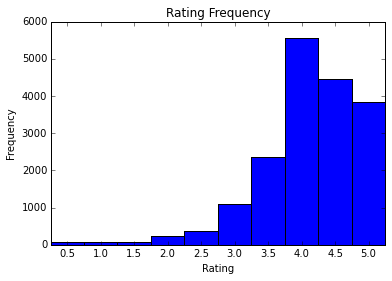

In [25]:
movie_ratings = ratings.loc[ratings['movieId'] == movie_id]
x = movie_ratings
his = np.histogram(x, bins = np.arange(0.5,6,0.5))
fig, ax = plt.subplots()
offset = 0.25
plt.bar(his[1][1:],his[0],width=.5)
ax.set_xticks(his[1][1:] + offset)
ax.set_xticklabels(np.arange(0.5,6,0.5))
print "Number of Ratings:", movie_ratings.shape[0]
plt.title("Rating Frequency")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

### Evidence

In [26]:
print "Prediction: ",  y_pred[j]
print "Bias and evidences:", bias, neg_evi[j], pos_evi[j]
print "Positive Features"
print positive_df.head(10)
print "Negative Features"
print negative_df.head(10)

Prediction:  4.99937806679
Bias and evidences: 2.59323127438 -23.5257741292 25.9319209216
Positive Features
               Feature  Weights
0       Average Rating   2.0564
1                 golf   0.5745
2  main-character-shot   0.4948
3  Nicholson, Jack (I)   0.4751
4                chase   0.4338
5               racism   0.4303
6            earphones   0.4228
7      shot-in-the-leg   0.3981
8          photography   0.3945
9            detective   0.3698
Negative Features
            Feature  Weights
0         mind-game  -0.5618
1             drugs  -0.4861
2        microphone  -0.4534
3          gay-slur  -0.4415
4  african-american  -0.4324
5             wound  -0.4306
6            eating  -0.4186
7       destruction  -0.4133
8       crime-scene  -0.3955
9         golf-club  -0.3689


## The case that has the most positive evidence, regardless of negative evidence

In [28]:
j = np.argsort(pos_evi)[-1]
titles = pd.read_csv("ml-latest/matched_set.csv", sep = ",")
movie_id = movies[j]
movie_index = np.where(movies == movie_id)
movie_dm = dm[movie_index][0]
feature_names = features

positive_weights = movie_dm[movie_dm > 0]
negative_weights = movie_dm[movie_dm < 0]

positive_names = feature_names[movie_dm > 0]
negative_names = feature_names[movie_dm < 0]

positive_weights = np.column_stack((positive_names,positive_weights))
positive_weights = positive_weights[np.argsort(positive_weights[:,1])][::-1]

negative_weights = np.column_stack((negative_names,negative_weights))
negative_weights = negative_weights[np.argsort(negative_weights[:,1])][::-1]

positive_df = pd.DataFrame(positive_weights, columns = ["Feature", "Weights"])
positive_df = positive_df.convert_objects(convert_numeric=True)

negative_df = pd.DataFrame(negative_weights, columns = ["Feature", "Weights"])
negative_df = negative_df.convert_objects(convert_numeric=True)

pd.options.display.float_format = '{:,.4f}'.format

print "Movie Title: ", all_names[id_dict[movie_id]]
print "Actual User Rating: ", user_ratings[movie_id]
print "Predicted User Rating: ", y_pred[j]

Movie Title:  THE DEPARTED (2006)
Actual User Rating:  5.0
Predicted User Rating:  4.99937806679


### Movie Rating Distribution

Number of Ratings: 18133


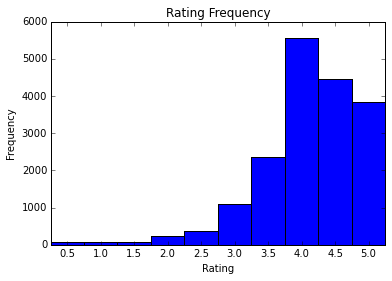

In [29]:
movie_ratings = ratings.loc[ratings['movieId'] == movie_id]
x = movie_ratings
his = np.histogram(x, bins = np.arange(0.5,6,0.5))
fig, ax = plt.subplots()
offset = 0.25
plt.bar(his[1][1:],his[0],width=.5)
ax.set_xticks(his[1][1:] + offset)
ax.set_xticklabels(np.arange(0.5,6,0.5))
print "Number of Ratings:", movie_ratings.shape[0]
plt.title("Rating Frequency")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

### Evidence

In [30]:
print "Prediction: ",  y_pred[j]
print "Bias and evidences:", bias, neg_evi[j], pos_evi[j]
print "Positive Features"
print positive_df.head(10)
print "Negative Features"
print negative_df.head(10)

Prediction:  4.99937806679
Bias and evidences: 2.59323127438 -23.5257741292 25.9319209216
Positive Features
               Feature  Weights
0       Average Rating   2.0564
1                 golf   0.5745
2  main-character-shot   0.4948
3  Nicholson, Jack (I)   0.4751
4                chase   0.4338
5               racism   0.4303
6            earphones   0.4228
7      shot-in-the-leg   0.3981
8          photography   0.3945
9            detective   0.3698
Negative Features
            Feature  Weights
0         mind-game  -0.5618
1             drugs  -0.4861
2        microphone  -0.4534
3          gay-slur  -0.4415
4  african-american  -0.4324
5             wound  -0.4306
6            eating  -0.4186
7       destruction  -0.4133
8       crime-scene  -0.3955
9         golf-club  -0.3689


# Most conflicted

In [38]:
conflict = np.min([abs(neg_evi), pos_evi], axis=0)
indices = np.argsort(conflict)
j=indices[-1]
titles = pd.read_csv("ml-latest/matched_set.csv", sep = ",")
movie_id = movies[j]
movie_index = np.where(movies == movie_id)
movie_dm = dm[movie_index][0]
feature_names = features

positive_weights = movie_dm[movie_dm > 0]
negative_weights = movie_dm[movie_dm < 0]

positive_names = feature_names[movie_dm > 0]
negative_names = feature_names[movie_dm < 0]

positive_weights = np.column_stack((positive_names,positive_weights))
positive_weights = positive_weights[np.argsort(positive_weights[:,1])][::-1]

negative_weights = np.column_stack((negative_names,negative_weights))
negative_weights = negative_weights[np.argsort(negative_weights[:,1])][::-1]

positive_df = pd.DataFrame(positive_weights, columns = ["Feature", "Weights"])
positive_df = positive_df.convert_objects(convert_numeric=True)

negative_df = pd.DataFrame(negative_weights, columns = ["Feature", "Weights"])
negative_df = negative_df.convert_objects(convert_numeric=True)

pd.options.display.float_format = '{:,.4f}'.format

print "Movie Title: ", all_names[id_dict[movie_id]]
print "Actual User Rating: ", user_ratings[movie_id]
print "Predicted User Rating: ", y_pred[j]

Movie Title:  THE DEPARTED (2006)
Actual User Rating:  5.0
Predicted User Rating:  4.99937806679


### Movie Rating Distribution

Number of Ratings: 18133


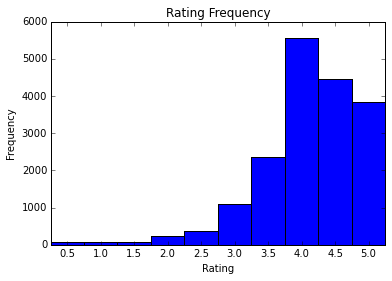

In [39]:
movie_ratings = ratings.loc[ratings['movieId'] == movie_id]
x = movie_ratings
his = np.histogram(x, bins = np.arange(0.5,6,0.5))
fig, ax = plt.subplots()
offset = 0.25
plt.bar(his[1][1:],his[0],width=.5)
ax.set_xticks(his[1][1:] + offset)
ax.set_xticklabels(np.arange(0.5,6,0.5))
print "Number of Ratings:", movie_ratings.shape[0]
plt.title("Rating Frequency")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

### Evidence

In [34]:
print "Prediction: ",  y_pred[j]
print "Bias and evidences:", bias, neg_evi[j], pos_evi[j]
print "Positive Features"
print positive_df.head(10)
print "Negative Features"
print negative_df.head(10)

Prediction:  4.99937806679
Bias and evidences: 2.59323127438 -23.5257741292 25.9319209216
Positive Features
               Feature  Weights
0       Average Rating   2.0564
1                 golf   0.5745
2  main-character-shot   0.4948
3  Nicholson, Jack (I)   0.4751
4                chase   0.4338
5               racism   0.4303
6            earphones   0.4228
7      shot-in-the-leg   0.3981
8          photography   0.3945
9            detective   0.3698
Negative Features
            Feature  Weights
0         mind-game  -0.5618
1             drugs  -0.4861
2        microphone  -0.4534
3          gay-slur  -0.4415
4  african-american  -0.4324
5             wound  -0.4306
6            eating  -0.4186
7       destruction  -0.4133
8       crime-scene  -0.3955
9         golf-club  -0.3689


# Least amount of info

In [40]:
information = np.max([abs(neg_evi), pos_evi], axis=0)
indices = np.argsort(information)
j=indices[0]
titles = pd.read_csv("ml-latest/matched_set.csv", sep = ",")
movie_id = movies[j]
movie_index = np.where(movies == movie_id)
movie_dm = dm[movie_index][0]
feature_names = features

positive_weights = movie_dm[movie_dm > 0]
negative_weights = movie_dm[movie_dm < 0]

positive_names = feature_names[movie_dm > 0]
negative_names = feature_names[movie_dm < 0]

positive_weights = np.column_stack((positive_names,positive_weights))
positive_weights = positive_weights[np.argsort(positive_weights[:,1])][::-1]

negative_weights = np.column_stack((negative_names,negative_weights))
negative_weights = negative_weights[np.argsort(negative_weights[:,1])][::-1]

positive_df = pd.DataFrame(positive_weights, columns = ["Feature", "Weights"])
positive_df = positive_df.convert_objects(convert_numeric=True)

negative_df = pd.DataFrame(negative_weights, columns = ["Feature", "Weights"])
negative_df = negative_df.convert_objects(convert_numeric=True)

pd.options.display.float_format = '{:,.4f}'.format

print "Movie Title: ", all_names[id_dict[movie_id]]
print "Actual User Rating: ", user_ratings[movie_id]
print "Predicted User Rating: ", y_pred[j]

Movie Title:  FIVE DAYS ONE SUMMER (1982)
Actual User Rating:  3.5
Predicted User Rating:  3.44271599902


### Movie Rating Distribution

Number of Ratings: 6


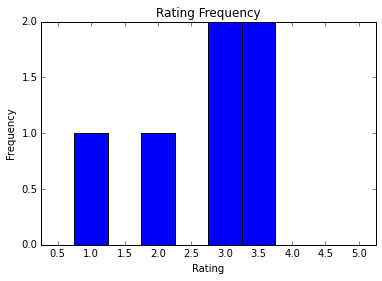

In [41]:
movie_ratings = ratings.loc[ratings['movieId'] == movie_id]
x = movie_ratings
his = np.histogram(x, bins = np.arange(0.5,6,0.5))
fig, ax = plt.subplots()
offset = 0.25
plt.bar(his[1][1:],his[0],width=.5)
ax.set_xticks(his[1][1:] + offset)
ax.set_xticklabels(np.arange(0.5,6,0.5))
print "Number of Ratings:", movie_ratings.shape[0]
plt.title("Rating Frequency")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

### Evidence

In [42]:
print "Prediction: ",  y_pred[j]
print "Bias and evidences:", bias, neg_evi[j], pos_evi[j]
print "Positive Features"
print positive_df.head(10)
print "Negative Features"
print negative_df.head(10)

Prediction:  3.44271599902
Bias and evidences: 2.59323127438 -0.71004580892 1.55953053356
Positive Features
             Feature  Weights
0      Connery, Sean   1.2363
1   independent-film   0.1737
2              Drama   0.1008
3              1930s   0.0482
4  Number of Ratings   0.0005
Negative Features
          Feature  Weights
0  Average Rating  -0.7100


## Defining movie matrix for unrated films

In [ ]:
user_cols = user_matrix.shape[1]
data = user_matrix[:, 1:(user_cols-1)]
target = user_matrix[:, (user_cols-1)]
user_rated = user_matrix[:, 0]-1
movie_file = open("postprocessed-data/movie_matrix", "r")
movie_matrix = pickle.load(movie_file)[:, 1:]
movie_file.close()

## Predicting unrated films using Lasso and 5 fold cross validation

In [ ]:
clf =TransparentLasso(min_lasso_alpha)
clf.fit(data,target)
all_pred = clf.predict(movie_matrix)
unrated_pred = np.delete(all_pred, user_rated, 0)
indices = np.argsort(unrated_pred)[::-1]
unrated_movies = np.delete(movies, user_rated, 0)
sorted_movies = unrated_movies[indices]
movie_df = pd.DataFrame(np.column_stack((sorted_movies,unrated_pred[indices])), columns = ['Movie', 'Prediction'])
print "Top predicted movies"
print movie_df.head(10)
print "Lowest predicted movies"
print movie_df.tail(10)